In [1]:
import pandas as pd
import numpy as np
import string
from navec import Navec
from slovnet.model.emb import NavecEmbedding
from pathlib import Path
from retell_utils.corpora_sugar import CorpusSugar
from retell_utils.metrics import get_cosine_sim, jaccard_text,show_statistics_and_bar, plot_confint
from tg.grammar_ru.corpus import CorpusReader
from tg.common._common import DataBundle
import retell_utils.embeddings as embeding_utils
import retell_utils.word2vec as word2vec_utils
from tg.common.analysis import Bootstrap, Aggregators, grbar_plot

In [2]:
retell_corpus = CorpusReader(Path("./featurized_corpuses/All retell.featurized.retell.corpus.zip"))
text_corpus = CorpusReader(Path("./featurized_corpuses/books.featurized.zip"))
martin_mapping = retell_corpus.read_mapping_data()

In [3]:
corpus_sugar = CorpusSugar(text_corpus, retell_corpus)
books, retell_books, summar_books = corpus_sugar.get_books_retell_info_by_author('Мартин')

In [4]:
model_path = Path("./navec_hudlit_v1_12B_500K_300d_100q.tar")
navec = Navec.load(model_path)
embeder = NavecEmbedding(navec)

/home/mixailkys/anaconda3/envs/grammar_ru/lib/python3.8/site-packages/slovnet/model/emb.py:46: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /opt/conda/conda-bld/pytorch_1678402316912/work/torch/csrc/utils/tensor_numpy.cpp:206.)
  torch.from_numpy(navec.pq.indexes),


In [5]:
db = DataBundle.load('./Martin-bundle.zip')
martin_spec_word_vocab = db.words.set_index('word').nf_n.to_dict()
better_fine_tuned_vec = pd.read_csv(Path("./Martin-better.csv"), sep='\t').iloc[:, 1:]

In [6]:
ban_words = set(string.punctuation + "«—»…")
ban_words.update(["!!", "!?", "?!", "??", "?.."])

In [7]:
fine_tuned_extract_retell = word2vec_utils.get_extract_retell(books,corpus_sugar.get_sentences,embeding_utils.get_vocab_embedding,better_fine_tuned_vec,martin_spec_word_vocab,ban_words=ban_words)

  0%|          | 0/82 [00:00<?, ?it/s]

In [8]:
navec_extract_retell = word2vec_utils.get_extract_retell(books,corpus_sugar.get_sentences,embeding_utils.get_vocab_embedding,embeder,navec.vocab,ban_words=ban_words)

  0%|          | 0/82 [00:00<?, ?it/s]

In [9]:
true_retell = corpus_sugar.get_true_retell('Мартин',"retell",retell_detail=5)

In [10]:
fine_tuned_jaccard_sim = np.array([jaccard_text(fine_tuned_extract_retell[i],true_retell[i]) for i in range(len(true_retell))])
fine_tuned_cos_sim = np.array([get_cosine_sim(fine_tuned_extract_retell[i],true_retell[i]) for i in range(len(true_retell))])

navec_jaccard_sim = np.array([jaccard_text(navec_extract_retell[i],true_retell[i]) for i in range(len(true_retell))])
navec_cos_sim = np.array([get_cosine_sim(navec_extract_retell[i],true_retell[i]) for i in range(len(true_retell))])

Дообученные вектора
median Индекс Жаккара: 0.09
max Индекс Жаккара: 0.172
min Индекс Жаккара: 0.037
------------------------------------
median Косинусное расстояние: 0.156
max Косинусное расстояние: 0.413
min Косинусное расстояние: 0.028
------------------------------------


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/mixailkys/PycharmProjects/grammar_ru/tg/common/ml/miscellaneous/kraken.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(pd_result)
/home/mixailkys/PycharmProjects/grammar_ru/tg/common/ml/miscellaneous/kraken.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(pd_result)
/home/mixailkys/PycharmProjects/grammar_ru/tg/common/ml/miscellaneous/kraken.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(pd_result)
/home/mixailkys/PycharmProjects/grammar_ru/tg/common/ml/miscellaneous/kraken.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.ap

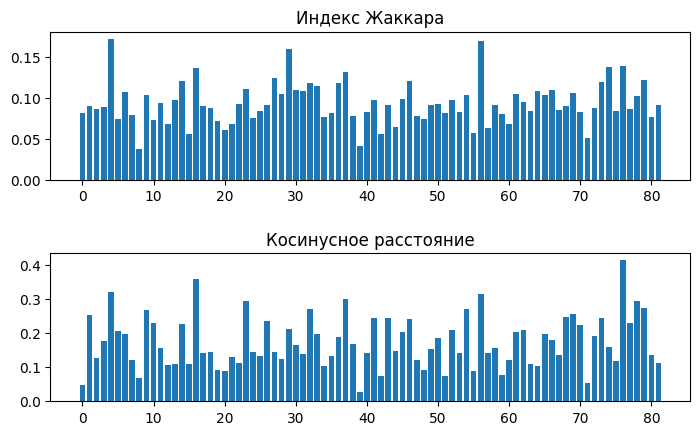

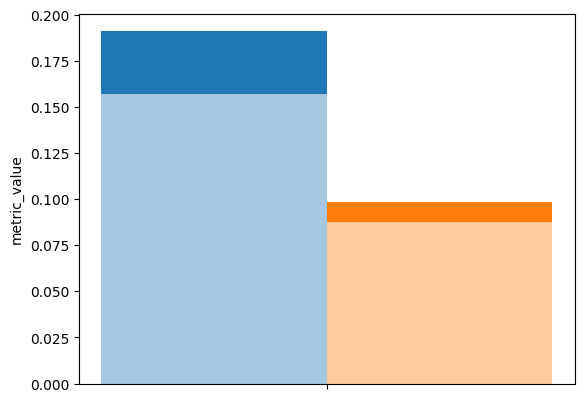

In [15]:
print("Дообученные вектора")
show_statistics_and_bar(fine_tuned_jaccard_sim,fine_tuned_cos_sim)
plot_confint(fine_tuned_jaccard_sim,fine_tuned_cos_sim)

Navec вектора
median Индекс Жаккара: 0.091
max Индекс Жаккара: 0.182
min Индекс Жаккара: 0.039
------------------------------------
median Косинусное расстояние: 0.167
max Косинусное расстояние: 0.381
min Косинусное расстояние: 0.013
------------------------------------


  0%|          | 0/1000 [00:00<?, ?it/s]

/home/mixailkys/PycharmProjects/grammar_ru/tg/common/ml/miscellaneous/kraken.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(pd_result)
/home/mixailkys/PycharmProjects/grammar_ru/tg/common/ml/miscellaneous/kraken.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(pd_result)
/home/mixailkys/PycharmProjects/grammar_ru/tg/common/ml/miscellaneous/kraken.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append(pd_result)
/home/mixailkys/PycharmProjects/grammar_ru/tg/common/ml/miscellaneous/kraken.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.ap

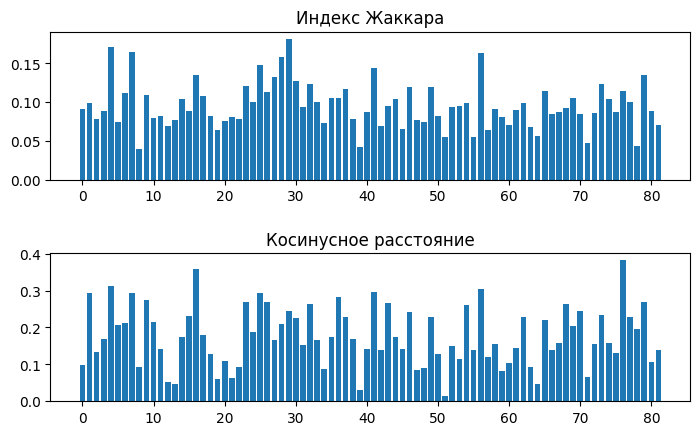

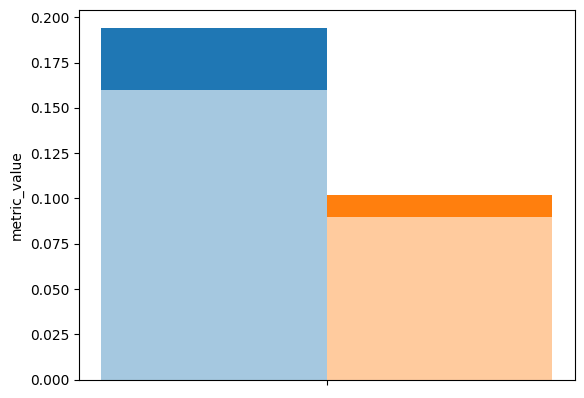

In [14]:
print("Navec вектора")
show_statistics_and_bar(navec_jaccard_sim,navec_cos_sim)
plot_confint(navec_jaccard_sim,navec_cos_sim)